In [1]:
from google.colab import drive

In [20]:
from google.colab import files
uploaded = files.upload()

Saving hrdata.csv to hrdata (1).csv


## **1. 데이터 분석 개요**

(1) 데이터 분석 목적

본 데이터 분석의 목적은 우리 회사의 우수 성과자들의 특성을 알아보는 것이다.

우수성과자들이 어떤 특성을 가지고 있는지 일반적으로 생각해보면 만족할 만한 월급을 받거나 근무환경이 좋은 것을 들 수 있다. 근무환경은 주변 동료들 간의 관계, 집과의 거리, 시간외 근무 등을 들 수 있다.


(2) 데이터 확인

데이터 분석에 들어가기전 전체 데이터들을 불러와서 확인 및 정제하는 과정을 수행하였습니다.

분석데이터는 object 9개와 나머지는 int64로 구성되어 있습니다. object는 혼합데이터를 의미합니다. int는 숫자 데이터로 정수 데이터를 저장할 수 있는데, 본 분석의 종속변수인 업무성과(PerformanceRating)도 여기에 해당됩니다.

In [21]:
import pandas as pd
df = pd.read_csv('hrdata.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

(3) 데이터 정제

중복행, 결측치를 확인한 결과,

데이터셋은 총 1470개의 행과 35개의 열로 구성되어 있었으며, 중복된 행은 존재하지 않았습니다.
숫자가 다른 변수가 존재하지 않아 결측치도 없는 것으로 확인할 수 있었습니다.

In [23]:
df.shape

(1470, 35)

In [24]:
df_duplicate = df[df.duplicated()]
print("numbers of duplicate:",df_duplicate.shape)

numbers of duplicate: (0, 35)


In [26]:
df = df.drop_duplicates()
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [28]:
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [29]:
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

(4) 분석요인변수 탐색

1) 상관관계 분석

업무성과가 어떤 요인에 의해 영향을 받는지 알기 위해 흔히 사용되는 상관관계를 먼저 사용하였습니다.
상관관계를 분석한 결과, 급여의 증가분 백분율(PercentSalaryHike) 변수가 0.77로 가장 강한 관계를 가지고 있었습니다.
(상관관계 분석은 1에 가까울 수록 강한 양의 상관관계를 가지며, -1에 가까울수록 강한 음의 상관관계를 가집니다. 0에 가까워지면 상관관계가 약하거나 없다는 것을 의미합니다.)



In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-34-17271e0c0bc9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


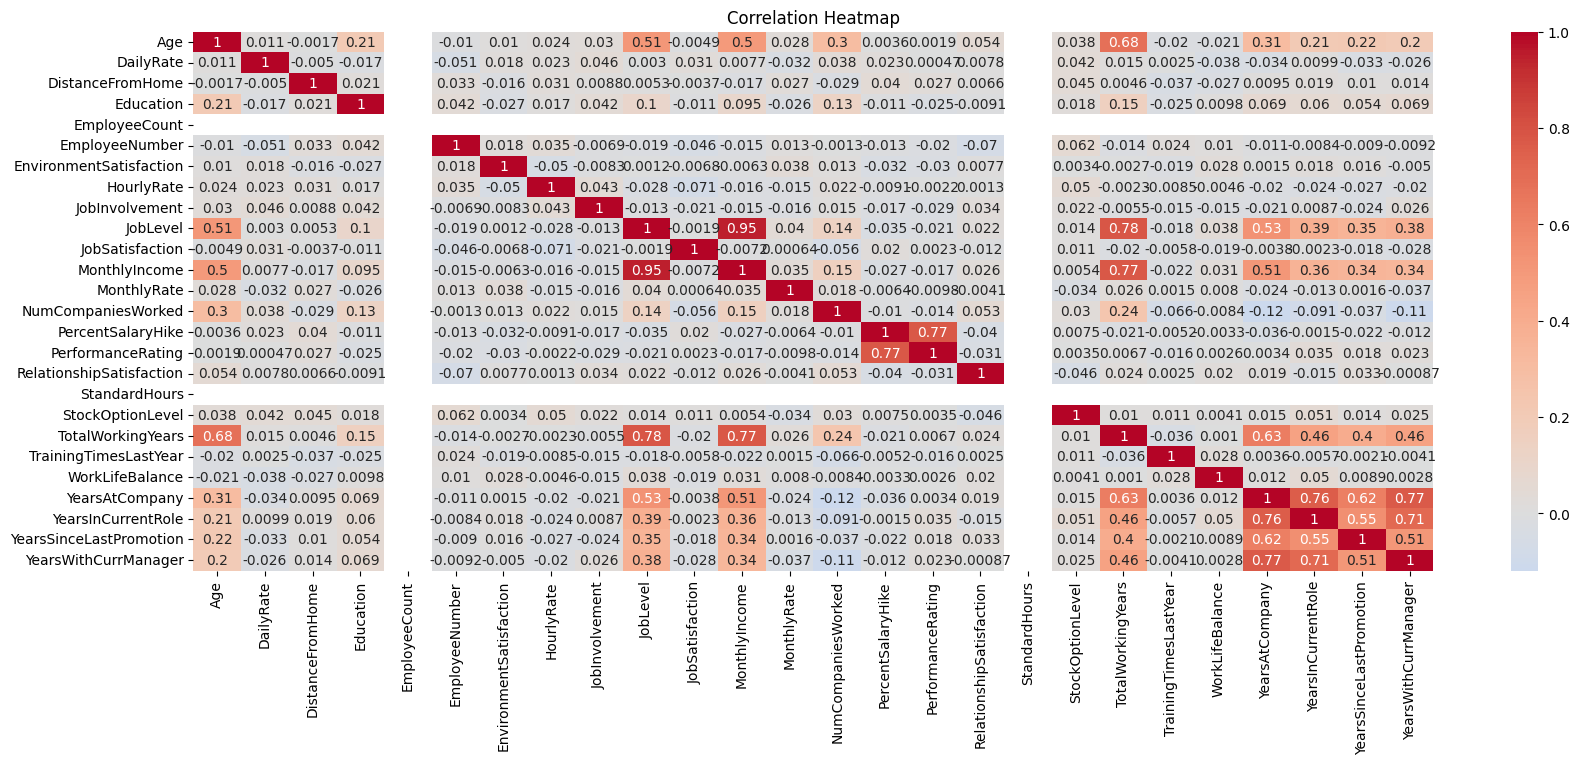

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Heatmap')
plt.show()

2) 회귀 분석

상관관계 분석에서 급여의 증가분 백분율(PercentSalaryHike) 변수가 0.77로 가장 강한 관계를 가졌으며,
그 외에는 현재 역할의 년수(YearsInCurrentRole) 0.035, 집과의 거리(DistanceFromHome) 0.027, 현재 관리자와 함께 보낸시간(YearsWithCurrManager) 0.023, 마지막 프로모션(YearsSinceLastPromotion) 0.018로 양의 상관관계를 가졌습니다.

하지만 상관관계 분석으로 나온 변수들이 종속변수인 업무성과에 영향을 미친다는 인과관계를 결정할 수 없기 때문에 추가적으로 위의 변수들을 이용하여 회귀분석을 시행하였습니다.



처음 회귀분석을 시행하였을 때 결정계수가 0.6이어서 종속변수를 설명하는데는 조금 강하다고 볼 수 없었습니다. 그리고 모든 변수의 p값을 보면 집과의 거리, 현재 관리자와 함께 보낸 시간을 제외하고는 0.05 미만으로 나타났습니다.
결정계수가 높게 나올 수 있을 것이라 예상하고 p값이 유의하지 않았던 집과의 거리, 현재 관리자와 함께 보낸 시간을 제외한 나머지 변수들을 이용해 회귀분석을 실행하였습니다.
결정계수의 값은 그래도 0.6이었지만, 모든 변수들의 p값은 유의하게 나타났습니다.


*   급여의 증가분 백분율이 1% 오르면 업무성과가 0.0763점 상승
*   현재 역할의 년수가 1년 증가하면 업무성과가 0.0024점 상승
*   마지막 프로모션 년수가 1년 증가하면 업무성과가 0.0024점 상승





In [40]:
import statsmodels.api as sm

In [41]:
data1 = df[['PercentSalaryHike','YearsInCurrentRole','DistanceFromHome','YearsWithCurrManager','YearsSinceLastPromotion']]
data2 = sm.add_constant(data1, has_constant = "add")

target = df["PerformanceRating"]

multi_model = sm.OLS(target, data2)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PerformanceRating   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     439.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          3.12e-288
Time:                        14:12:54   Log-Likelihood:                 86.731
No. Observations:                1470   AIC:                            -161.5
Df Residuals:                    1464   BIC:                            -129.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.9781      0.027     72.702      0.000       1.925       2.032
PercentSalaryHike           0.0763      0.002     46.793      0.000       0.073       0.080
YearsInCurrentRole          0.0019      0.002      0.783      0.434      -0.003       0.007
DistanceFromHome           -0.0002      0.001     -0.286      0.775      -0.002       0.001
YearsWithCurrManager        0.0008      0.002      0.326      0.744      -0.004       0.006
YearsSinceLastPromotion     0.0023      0.002      1.012      0.312      -0.002       0.007
==============================================================================
Omnibus:                       12.040   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.557
Skew:                          -0.050   Prob(JB):                       0.0139
Kurtosis:                       2.640   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
data1 = df[['PercentSalaryHike','YearsInCurrentRole','YearsSinceLastPromotion']]
data2 = sm.add_constant(data1, has_constant = "add")

target = df["PerformanceRating"]

multi_model = sm.OLS(target, data2)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PerformanceRating   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     733.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          4.68e-291
Time:                        14:14:34   Log-Likelihood:                 86.637
No. Observations:                1470   AIC:                            -165.3
Df Residuals:                    1466   BIC:                            -144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.9775      0.026     74.812      0.000       1.926       2.029
PercentSalaryHike           0.0763      0.002     46.847      0.000       0.073       0.080
YearsInCurrentRole          0.0024      0.002      1.227      0.220      -0.001       0.006
YearsSinceLastPromotion     0.0024      0.002      1.102      0.271      -0.002       0.007
==============================================================================
Omnibus:                       12.012   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.542
Skew:                          -0.050   Prob(JB):                       0.0140
Kurtosis:                       2.640   Cond. No.                         72.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##   **2**. 추가분석

종속변수인 업무성과와 관련된 분석을 위해 일정 구간의 변수빈도를 한눈에 쉽게 파악할 수 있는 히스토그램을 이용하였습니다.
히스토그램을 이용하여 분석한 결과 총 데이터셋 인원 1,470명 중 업무성과에서 3점을 받은 인원수는 1,244명, 4점을 받은 인원은 226명이었습니다.

<Axes: xlabel='PerformanceRating', ylabel='count'>

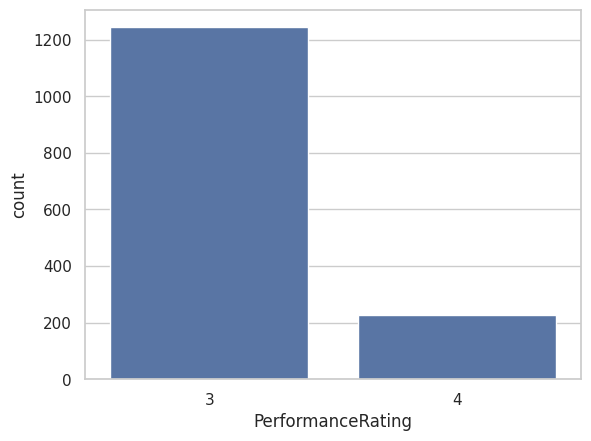

In [44]:
sns.set(style="whitegrid")
sns.countplot(x="PerformanceRating", data=df)

<ipython-input-49-a6dd4f447df5>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(y='PerformanceRating', x='PercentSalaryHike', orient='h', errwidth=0, data=df)


<Axes: xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

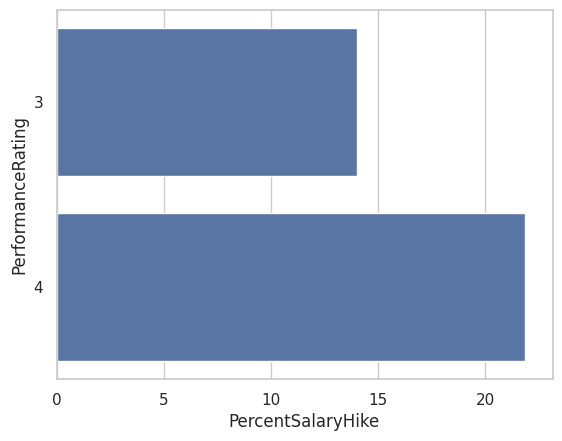

In [49]:
sns.barplot(y='PerformanceRating', x='PercentSalaryHike', orient='h', errwidth=0, data=df)

<ipython-input-56-a4cf37016630>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='TotalWorkingYears', y='PerformanceRating', orient='h', errwidth=0, data=df)


<Axes: xlabel='TotalWorkingYears', ylabel='PerformanceRating'>

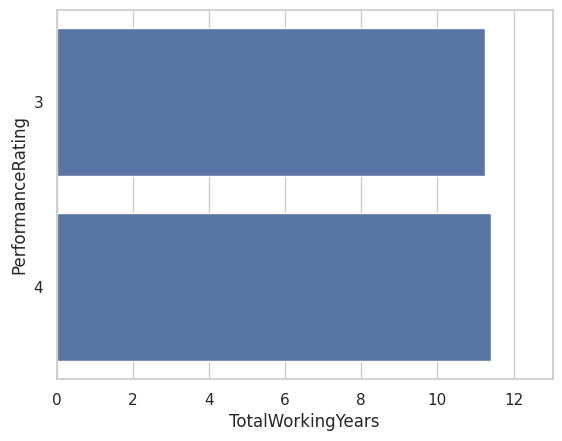

In [56]:
sns.barplot(x='TotalWorkingYears', y='PerformanceRating', orient='h', errwidth=0, data=df)

<ipython-input-58-74fe8524aa23>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='WorkLifeBalance', y='PerformanceRating', orient='h', errwidth=0, data=df)


<Axes: xlabel='WorkLifeBalance', ylabel='PerformanceRating'>

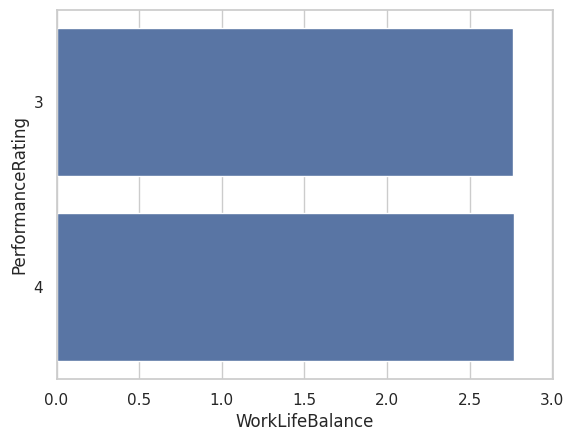

In [58]:
sns.barplot(x='WorkLifeBalance', y='PerformanceRating', orient='h', errwidth=0, data=df)

<ipython-input-50-6b4c38d26934>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='YearsInCurrentRole', y='PerformanceRating', orient='h', errwidth=0, data=df)


<Axes: xlabel='YearsInCurrentRole', ylabel='PerformanceRating'>

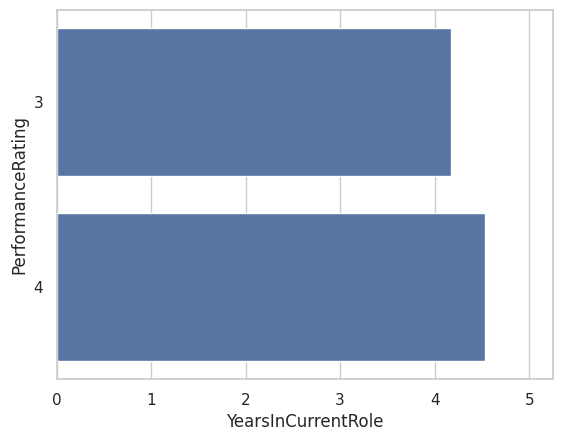

In [50]:
sns.barplot(x='YearsInCurrentRole', y='PerformanceRating', orient='h', errwidth=0, data=df)

<ipython-input-51-3a480f46f158>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='YearsSinceLastPromotion', y='PerformanceRating', orient='h', errwidth=0, data=df)


<Axes: xlabel='YearsSinceLastPromotion', ylabel='PerformanceRating'>

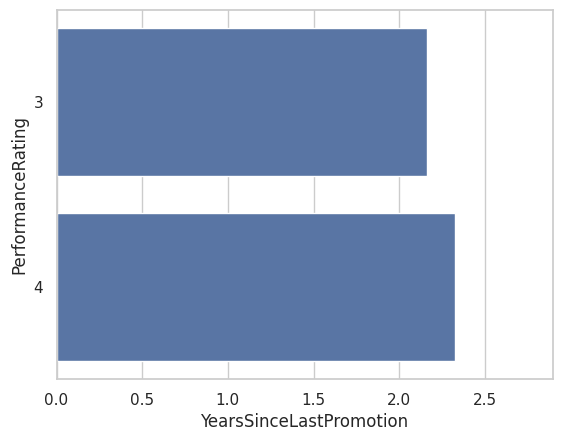

In [51]:
sns.barplot(x='YearsSinceLastPromotion', y='PerformanceRating', orient='h', errwidth=0, data=df)

<ipython-input-61-05f05a174c14>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='StockOptionLevel', y='PerformanceRating', orient='h', errwidth=0, data=df)


<Axes: xlabel='StockOptionLevel', ylabel='PerformanceRating'>

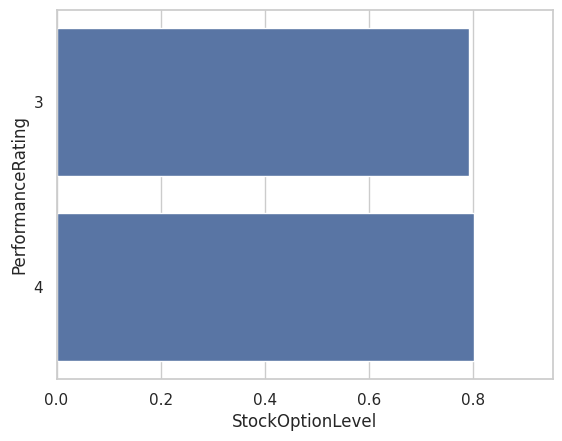

In [61]:
sns.barplot(x='StockOptionLevel', y='PerformanceRating', orient='h', errwidth=0, data=df)

업무성과와 급여의 증가분 백분율(PercentSalaryHike)의 관계를 비교했을 때, 4점인 경우 평균 21.84%, 3점은 평균 14.0%였습니다. 현재 역할의 년수와 비교했을 때는 3점일 경우 평균 4.18년, 4점일 경우 4.23년으로 크게 차이가 있지 않았습니다. 마지막 승진 년수와 비교하였을 때 3점일 경우 평균 2.163년, 4점일 경우 2.323년으로 역시 차이가 많이 나지 않았습니다. 경력기간(TotalWorkingYears), 일과 생활의 균형정도(WorkLifeBalance), 스톡옵션 정도(StockOptionLevel)은 거의 업무성과가 높으나 적으나 동일하여 영향을 미치지 못하는 것으로 보입니다.


In [66]:
data1 = df[['TotalWorkingYears','PercentSalaryHike','YearsInCurrentRole','YearsSinceLastPromotion','WorkLifeBalance','StockOptionLevel']]
data2 = sm.add_constant(data1, has_constant = "add")

target = df["PerformanceRating"]

multi_model = sm.OLS(target, data2)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PerformanceRating   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     365.8
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          7.04e-287
Time:                        15:22:06   Log-Likelihood:                 86.708
No. Observations:                1470   AIC:                            -159.4
Df Residuals:                    1463   BIC:                            -122.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.9721      0.036     54.476      0.000       1.901       2.043
TotalWorkingYears           0.0002      0.001      0.192      0.848      -0.002       0.002
PercentSalaryHike           0.0763      0.002     46.799      0.000       0.073       0.080
YearsInCurrentRole          0.0023      0.002      1.101      0.271      -0.002       0.006
YearsSinceLastPromotion     0.0024      0.002      1.039      0.299      -0.002       0.007
WorkLifeBalance             0.0019      0.008      0.229      0.819      -0.015       0.019
StockOptionLevel           -0.0016      0.007     -0.232      0.817      -0.015       0.012
==============================================================================
Omnibus:                       11.944   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.501
Skew:                          -0.050   Prob(JB):                       0.0143
Kurtosis:                       2.641   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

추가적으로 일과 생활의 균형정도, 스톡옵션 정도, 경력기간을 포함시켜 위해서 분석했던 마지막 승진, 현재 역할의 년수 등과 같이 회귀분석을 실행하였습니다.
결정계수의 값은 0.6을 계속 유지하였다. 하지만 추가하였던 일과 생활의 균형정도, 스톡욥션 정도, 경력 기간의 p값이 0.5 이상이여서 유의하지 않게 나타났습니다.


## **3. 보고**

**1. 배경**
*   회사 내에서 업무 성과를 올리고 있는 직원들이 증가하는 추세를 보입니다. 그래서 회사 내에서 우수한 성과를 올리는 직원들이 나오는 요인들을 확인고자 분석하게 되었습니다.

**2. 데이터**
*  종속변수는 업무성과(PerformanceRating)으로 설정하고, 독립변수들은 업무성과와 관련성이 높아보이는 급여의 증가분 백분율(PercentsalaryHike), 현재 역할의 년수(YearsWithCurrManager), 마지막 프로모션 년수(YearsSinceLastPromotion)을 중심으로 분석하였습니다.

**3. 분석**
*  일반 통계 분석, 상관관계 분석, 회귀분석 모델을 이용하여 분석하였습니다.

  1)   일반 통계 분석
  *   히스토그램을 이용하여 분석한 결과 총 데이터셋 인원 1,470명 중 업무성과에서 3점을 받은 인원수는 1,244명, 4점을 받은 인원은 226명이었습니다.
  *   업무성과와 급여의 증가분 백분율(PercentSalaryHike)의 관계를 비교했을 때, 4점인 경우 평균 21.84%, 3점은 평균 14.0%였습니다.
  *    현재 역할의 년수와 비교했을 때는 3점일 경우 평균 4.18년, 4점일 경우 4.23년으로 크게 차이가 있지 않았습니다. 마지막 승진 년수와 비교하였을 때 3점일 경우 평균 2.163년, 4점일 경우 2.323년으로 역시 차이가 많이 나지 않았습니다. 경력기간(TotalWorkingYears), 일과 생활의 균형정도(WorkLifeBalance), 스톡옵션 정도(StockOptionLevel)은 거의 업무성과가 높으나 적으나 동일하여 영향을 미치지 못하는 것으로 보입니다.
  
  2)  상관관계 분석
  *  업무성과가 어떤 요인에 의해 영향을 받는지 알기 위해 흔히 사용되는 상관관계를 먼저 사용하였습니다.상관관계를 분석한 결과, 급여의 증가분 백분율(PercentSalaryHike) 변수가 0.77로 가장 강한 관계를 가지고 있었습니다.
  *   그 외에는 현재 역할의 년수(YearsInCurrentRole) 0.035, 집과의 거리(DistanceFromHome) 0.027, 현재 관리자와 함께 보낸시간(YearsWithCurrManager) 0.023, 마지막 프로모션(YearsSinceLastPromotion) 0.018로 양의 상관관계를 가졌습니다.
  *   하지만 상관관계 분석을 하였어도 독립변수가 종속변수인 업무성과에 영향을 준다는 인과관계를 결정할 수 없기 때문에 추가적으로 회귀분석을 이용하여 분석하였습니다.
  
  3) 회귀 분석
  *   처음 회귀분석을 시행하였을 때 결정계수가 0.6이어서 종속변수를 설명하는데는 조금 강하다고 볼 수 없었습니다. 그리고 모든 변수의 p값을 보면 집과의 거리, 현재 관리자와 함께 보낸 시간을 제외하고는 0.05 미만으로 나타났습니다결정계수가 높게 나올 수 있을 것이라 예상하고 p값이 유의하지 않았던 집과의 거리, 현재 관리자와 함께 보낸 시간을 제외한 나머지 변수들을 이용해 회귀분석을 실행하였습니다.
  결정계수의 값은 그래도 0.6이었지만, 모든 변수들의 p값은 유의하게 나타났습니다.
     *   급여의 증가분 백분율이 1% 오르면 업무성과가 0.0763점 상승
     *   현재 역할의 년수가 1년 증가하면 업무성과가 0.0024점 상승
     *   마지막 프로모션 년수가 1년 증가하면 업무성과가 0.0024점 상승

**4. 결과**
*   상관관계분석과 회귀분석을 통해 급여의 증가분 백분율이 업무 성과에 영향을 줄 수 있다는 것을 알 수 있었습니다.
*   추가적으로 일과 생활의 균형정도, 스톡옵션 정도, 경력기간을 포함시켜 위해서 분석했던 마지막 승진, 현재 역할의 년수 등과 같이 회귀분석을 실행하였습니다. 하지만 추가하였던 일과 생활의 균형정도, 스톡욥션 정도, 경력 기간의 p값이 0.5 이상이여서 유의하지 않게 나타났습니다.
*   따라서 직원들의 업무 성과를 높이는데 결정적인 요인이 된 것은 급여의 증가분 백분율이라고 볼 수 있다. 성과금 등을 지불하는 것도 중요하지만 급여의 증가분 백분율을 높이기 위해서는 직원별 성과를 상세히 파악하여 업무 평가 과정에 반영할 필요가 있다고 생각합니다. 이를 위해서는 업무평가 내용을 현재의 역할에 대한 평가 등 조금 더 세부적인 항목으로 만들어 성과를 평가한다면 급여의 증가분 백분율을 높이는데 영향을 줄 수 있다고 생각합니다.


